* This is Part 1 of 4 Code files for Week 2 Titanic Modelling assignment
### Week 2 Project Titanic Dataset Classifcation
##Load the dataset and preform Data Exploration and perform Feature Engineering

In [2]:

import pandas as pd
import os
import numpy as np
#wd = os.getcwd()
wd = 'C:/Users/lisbo/OneDrive/AC Career/Spiced_Academy_DS/spiced_projects/cascabel-curve-student-code/week_02/data/'

df = pd.read_csv(wd + 'train.csv', index_col=0, header =0)


Calculate the number of surviving/non-surviving passengers and display it as a bar plot.

In [3]:
df = df.reset_index()
df.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
##investigate dataset

print(df.describe()   );
print('\n')
print(df.isna().sum() );
print('\n')
df.info()
print('\n')


       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex

In [5]:
##investigte dataset
print(df['Survived'].value_counts())
print('\n')
print(df['Pclass'].value_counts())
print('\n')
print(df['Sex'].value_counts())
print('\n')
print(df['Cabin'].unique())
print('\n')
print(df['Cabin'].value_counts())
print('\n')
print(df['Embarked'].value_counts())




0    549
1    342
Name: Survived, dtype: int64


3    491
1    216
2    184
Name: Pclass, dtype: int64


male      577
female    314
Name: Sex, dtype: int64


[nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121'

In [6]:

empDfObj = pd.DataFrame(df,df.columns)
dataTypeSeries = empDfObj.dtypes

print('Data type of each column of Dataframe :')
print(dataTypeSeries)

Data type of each column of Dataframe :
PassengerId    float64
Survived       float64
Pclass         float64
Name            object
Sex             object
Age            float64
SibSp          float64
Parch          float64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


Impute new values for Age

In [7]:
##assess the average ages of passengers based on their Sex and Pclass

df_byPclass = df.groupby(by=['Sex','Pclass'])
df_byPclass = df.groupby(by=['Sex','Pclass'])
df_byPclass['Age'].mean()
#df_byPclass['Age_i'].mean() 


Sex     Pclass
female  1         34.611765
        2         28.722973
        3         21.750000
male    1         41.281386
        2         30.740707
        3         26.507589
Name: Age, dtype: float64

In [8]:
#Impute the average age based on the average age by 'Sex' and 'Pclass'
df_byPclass = df.groupby(by=['Sex','Pclass'])
df_byPclass['Age'].mean()

df['C1'] = np.where(np.isnan(df['Age'].values),1,0) 

def new_val(df):    
    if  (df['C1'] == 1 ) & (df['Sex'] == 'female' ) & (df['Pclass'] == 1)  :
        return 35
    elif (df['C1'] == 1) & (df['Sex'] == 'female')  & (df['Pclass'] == 2)  :
        return 29
    elif (df['C1'] == 1) & (df['Sex'] == 'female' ) & (df['Pclass'] == 3)  :
        return 21
    elif (df['C1'] == 1) & (df['Sex'] == 'male')  & (df['Pclass'] == 1)  :
        return 4
    elif (df['C1'] == 1) & (df['Sex'] == 'male')  & (df['Pclass'] == 2)   :
        return 31   
    elif (df['C1'] == 1) & (df['Sex'] == 'male')  & (df['Pclass'] == 3 )  :
        return 27 
    else:
        return df['Age']

df['Age_i'] = df.apply(new_val, axis = 1)


In [9]:
###create Age categoricla variable
df['Age_i'] = df['Age_i'].astype(int)

def new_acat(df):    
    if  (df['Age_i'] <= 12 )  :
        return 'Child'
    elif (df['Age_i'] > 12) & (df['Age_i'] <= 19)  :
        return 'Teenager'
    elif (df['Age_i'] > 19) & (df['Age_i'] <= 35 )  :
        return 'Young_Adults'
    elif (df['Age_i'] > 35) & (df['Age_i'] <= 60 )  :
        return 'Middle_Aged'
    elif (df['Age_i'] > 60)   :
        return 'Elderly'   

df['Age_Cat'] = df.apply(new_acat, axis = 1)



In [10]:
##convert new age categories into dummy variables   
age_dums = pd.get_dummies(df['Age_Cat'])
df=df.join(age_dums, lsuffix="_left", rsuffix="_right")

###
##create numeric Age categorical variable for he Randow Forrest data
df['Age_Cat_i'] = df['Age_Cat'].map({'Child':  0, 'Teenager':  1, 'Young_Adults': 2, 'Middle_Aged':  3, 'Elderly':  4 })


In [11]:
#Extract the titles from the name field to 
import re #import the regular expresiona package

def create_title(name):
    
    # try to find the pattern, returns None if nothing is found
    title_search = re.search(' ([A-Za-z]+)\.', name)
    
    # return the title if exists
    if title_search:
        return title_search.group(1)
    
    else:
        return ""

# create the new title column
df['Title'] = df['Name'].apply(create_title)

# print out all the different titles found
print(df['Title'].unique()),
print(df['Title'].value_counts())




['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'Countess' 'Jonkheer']
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Don           1
Countess      1
Ms            1
Mme           1
Capt          1
Sir           1
Jonkheer      1
Lady          1
Name: Title, dtype: int64


In [12]:
#group and rename the less frequent Titles into a 'RareTitle' categrory value:
#Rename the followin titles:

replacements = {
   'Title': {
    'Dr': 'RareTitle', 
    'Major': 'RareTitle', 
    'Col': 'RareTitle', 
    'Mile': 'RareTitle', 
    'Capt': 'RareTitle', 
    'Ms': 'RareTitle', 
    'Jonkheer': 'RareTitle', 
    'Don': 'RareTitle', 
    'Sir': 'RareTitle', 
    'Lady': 'RareTitle',
    'Countess': 'RareTitle',
    'M': 'RareTitle',
    'Mme': 'RareTitle',
    'Rev': 'RareTitle',
    'Mlle': 'RareTitle'}
}

df.replace(replacements,  inplace=True)


In [13]:
df['Title'].unique()
df['Title'].value_counts()
#convert the 'Title' column into a binary dummy set of variables for each unique categoy:
#'Mr', 'Mrs', 'Miss', 'Master', 'RareTitle', 'Rev', 'Mlle'

title_dums = pd.get_dummies(df['Title'])
df=df.join(title_dums, lsuffix="_left", rsuffix="_right")

In [14]:
df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'RareTitle'], dtype=object)

In [15]:
#also create a numeric Title_cat column for the Randowm Forrest Model:

def title_acat(df):    
    if  (df['Title'] == 'Mr' )  :
        return 0
    elif (df['Title'] == 'Mrs')   :
        return 1
    elif (df['Title'] == 'Miss')  :
        return 2
    elif (df['Title'] == 'Master')   :
        return 3
    elif (df['Title'] == 'RareTitle')   :
        return 4   

df['Title_Cat'] = df.apply(title_acat, axis = 1).astype(int)
#df['Title_Cat'] = df['Title_Cat'].astype(int)

modify the Fares variable

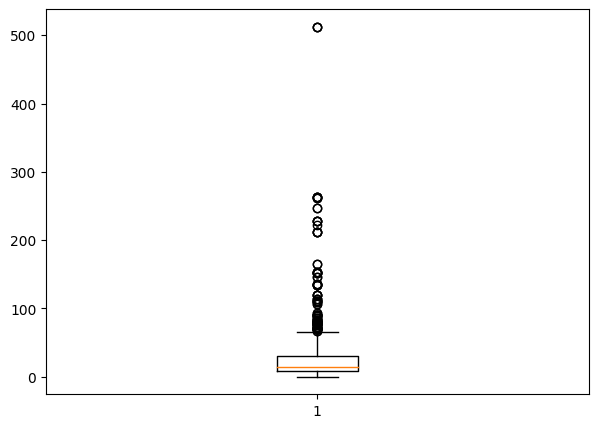

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
50.4958     1
13.8583     1
8.4583      1
7.7250      1
7.5208      1
Name: Fare, Length: 248, dtype: int64

In [16]:
#pd.qcut(df['Fare'], 4, labels=None, retbins=False, precision=3, duplicates='raise')

# Import libraries
import matplotlib.pyplot as plt
fig = plt.figure(figsize =(7, 5))
# Creating plot
plt.boxplot(df['Fare'])
# show plot
plt.show()

df['Fare'].value_counts()



In [17]:
###create  new Fare categorical variable

def new_fcat(df):    
    if  (df['Fare'] < 10 )  :
        return 'Fare_lt10'
    elif (df['Fare'] >= 10) & (df['Fare'] <= 25)  :
        return 'Fare_btw_10_25'
    elif (df['Fare'] > 25) & (df['Fare'] <= 50 )  :
        return 'Fare_mt25_50'
    elif (df['Fare'] > 50) & (df['Fare'] <= 100 )  :
        return 'Fare_mt50_100'
    elif (df['Fare'] > 100)   :
        return 'Fare_mt100'   

df['Fare_Cat'] = df.apply(new_fcat, axis = 1)

##make numeric 'Fare_Cat' column for Random Forrest model
df['Fare_Cat'] = df.apply(new_fcat, axis = 1)


In [18]:

df['Fare_Cat_i'] = df['Fare_Cat'].replace(['Fare_lt10', 'Fare_btw_10_25', 'Fare_mt25_50','Fare_mt50_100','Fare_mt100'],
                        [0, 1,2,3,4])
df['Fare_Cat_i'] = df['Fare_Cat_i'].astype(int)


In [19]:
#create dummy variable for Fare variable

df['Fare_Cat'].unique()
df['Fare_Cat'].value_counts()

fare_dums = pd.get_dummies(df['Fare_Cat'])
df=df.join(fare_dums, lsuffix="_left", rsuffix="_right")

In [20]:
# Replace ['Embarked'] column NaN values with 'S' the most common value
df['Embarked'] = df['Embarked'].fillna('S')
# check if all values have been replaced
print("Remaining NaN values: {}".format(df['Embarked'].isnull().sum()))

Remaining NaN values: 0


In [21]:
# convert 'Sex' and 'Embarked' into numeric variables for the model
# female equals 0 and male equals 1 in the sex column
df['Sex'] =  df['Sex'].map({'female': 0, 'male': 1})

# C = 0, Q = 1, S = 2 in the embarked column
df['Embarked'] = df['Embarked'].map({'C':  0, 'Q':  1, 'S': 2})

Create a 'Deck' variable from the Cabin variable

In [22]:
#df.drop([ 'Deck'], axis=1, inplace=True) 

In [23]:
import re #regex library for character search

deck = {"A": "Deck_A", "B": "Deck_B", "C": "Deck_C", "D": "Deck_D", "E": "Deck_E", "F": "Deck_F", "G": "Deck_G", "U": "U"}

df['Cabin'] = df['Cabin'].fillna("U0")
df['Deck'] = df['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
df['Deck'] = df['Deck'].map(deck)
df['Deck'] = df['Deck'].fillna(0) ##replace all the missing values with a 0
df['Deck'] = df['Deck'].astype(str)


In [24]:
##create 'Deck' dummies variable for the Logistic regression model
Deck_dums = pd.get_dummies(df['Deck'])
df=df.join(Deck_dums, lsuffix="_left", rsuffix="_right")

##create numeric categorical variable for he Randow Forrest data
df['Deck'] = df['Deck'].map({'Deck_A':  0, 'Deck_B':  1, 'Deck_C': 2, 'Deck_D':  3, 'Deck_E':  4, 'Deck_F': 5,  'Deck_G':  6, 'U':  7    })


In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
from calendar import c
import plotly.express as go
import numpy as np
import plotly.express as px


Calculate the number of surviving/non-surviving passengers and display it as a bar plot.

<AxesSubplot:ylabel='Survived'>

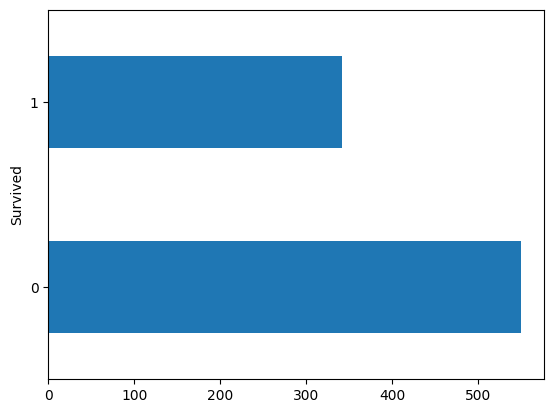

In [26]:
#create groupby plot 
df.groupby(['Survived'])['Survived'].count().plot(kind='barh',x='Passengers')


Calculate the proportion of surviving 1st class passengers with regards to the total number of 1st class passengers

<AxesSubplot:ylabel='Survived'>

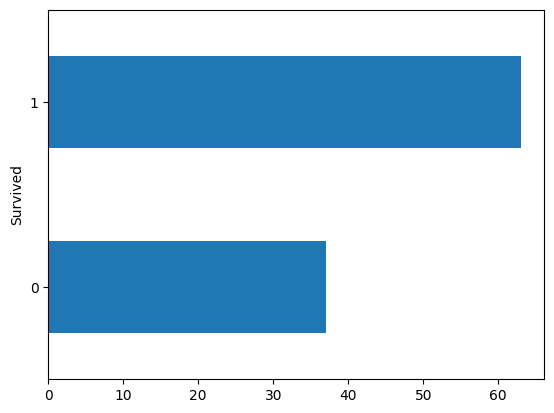

In [27]:
from itertools import count
from tkinter.tix import COLUMN


surv_p =  df[['Survived', 'Pclass']]
surv_p = surv_p[surv_p["Pclass"] == 1]
surv_p = surv_p.reset_index()


surv_p.drop(['Pclass'], axis=1, inplace=True)
surv_p = surv_p.rename(columns = {'index':'Counts'})

prop = surv_p.groupby(by=['Survived'])
prop  = prop.count()

(prop['Counts'] / prop['Counts'].sum()) * 100,
((prop['Counts'] / prop['Counts'].sum()) * 100).plot(kind='barh',x='Passengers')


Create a bar plot with separate bars for male/female passengers and 1st/2nd/3rd class passengers

<AxesSubplot:xlabel='Pclass'>

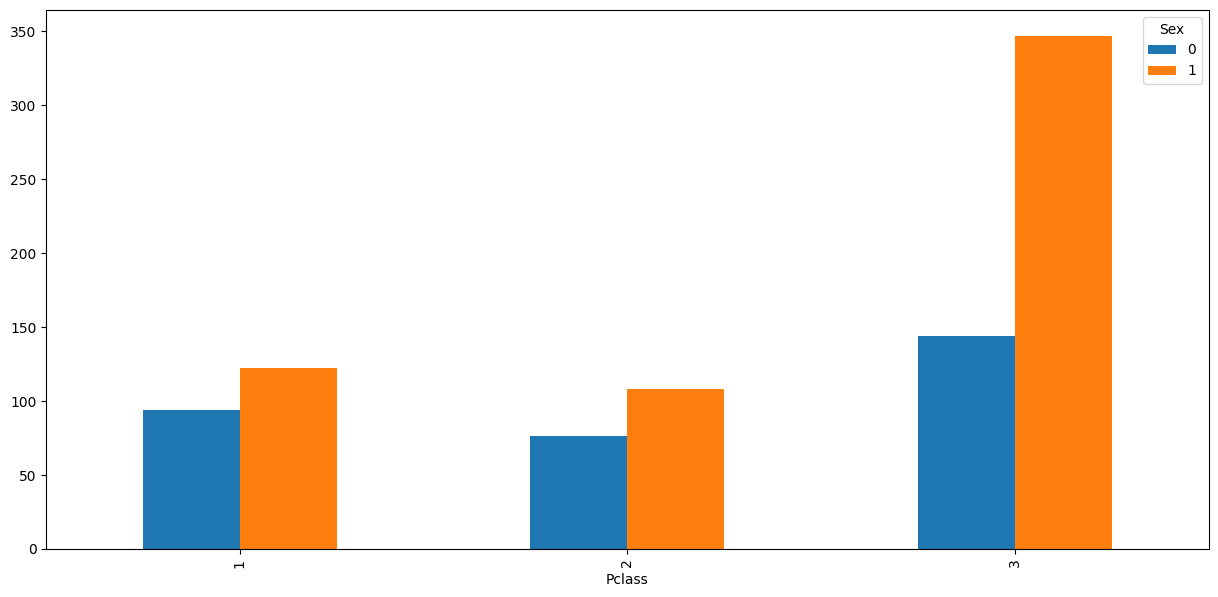

In [28]:

fig, ax = plt.subplots(figsize=(15,7))
df.groupby(['Pclass','Sex']).count()['Survived'].unstack().plot(ax=ax,kind="bar")

#plot(ax=ax,kind="bar")

Create a histogram showing the age distribution of passengers. Compare surviving/non-surviving passengers

In [29]:
# calculate the survival rates and counts for the different age groups
age_surv = df[['Age_Cat', 'Survived']].groupby('Age_Cat').agg(['mean', 'count', 'sum'])
# reindex to get the correct order in the calculated data frame
age_surv = age_surv.reindex()

# change the column headers
age_surv.columns = age_surv.columns.droplevel() # remove multilevel index
age_surv.columns = ['Survival rate', 'Total', 'Survived']

# create a new column containing the number of passengers that died
age_surv['Died'] = age_surv['Total'] - age_surv['Survived']

age_surv = age_surv.reset_index() 






In [30]:
#create sort column for age_surv dataframe

def new_acatn(age_surv):    
    if  (age_surv['Age_Cat'] == 'Child' )  :
        return 0
    elif (age_surv['Age_Cat'] == 'Teenager' )  :
        return 1
    elif (age_surv['Age_Cat'] == 'Young_Adults' )  :
        return 2
    elif (age_surv['Age_Cat'] == 'Middle_Aged' )  :
        return 3
    elif (age_surv['Age_Cat'] == 'Elderly' )  :
        return 4   

#age_surv['Age_Cats_n'] = age_surv.apply(new_acatn, axis = 1)
age_surv['Age_Cats_n'] = age_surv.apply(new_acatn, axis = 1)
age_surv.sort_values('Age_Cats_n', inplace= True)


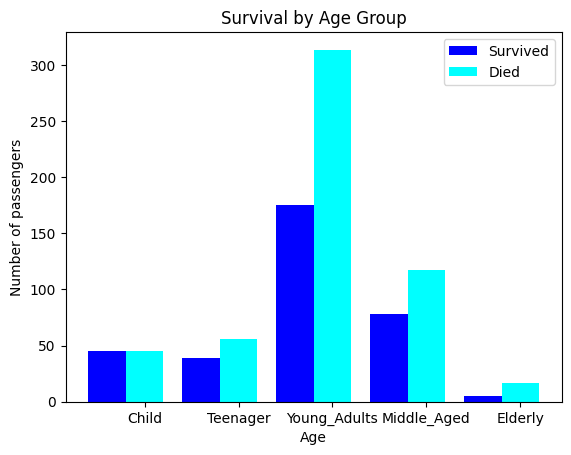

In [31]:
ind = np.arange(len( age_surv))
width = 0.4

# bar plot
fig, ax = plt.subplots()
survived = age_surv['Survived'].values
bar1 = ax.bar(ind, survived, width=width, color='blue', label='Survived')
died = age_surv['Died'].values
bar2 = ax.bar(ind + width, died, width=width, color='cyan', 
              label='Died')

# format plot
ax.set(xlabel='Age', xticks=(ind + width), xticklabels=age_surv['Age_Cat'].values, ylabel='Number of passengers', 
       title='Survival by Age Group')
plt.legend()
plt.show()


Calculate the average age for survived and drowned passengers separately.


In [32]:
df[[ 'Survived','Age_i']].groupby('Survived').agg(['mean', 'count', 'sum'])

Age_i             
               mean count    sum
Survived                        
0         28.979964   549  15910
1         27.593567   342   9437

Create a table counting the number of surviving/dead passengers separately for 1st/2nd/3rd class and male/female.

In [33]:
df.groupby(['Pclass','Sex']).count()['Survived']


Pclass  Sex
1       0       94
        1      122
2       0       76
        1      108
3       0      144
        1      347
Name: Survived, dtype: int64

In [36]:
#Save the  df dataframe so that it can be used in the Logistic Regression model

#df.drop([df.index[339]], inplace = True)
#df.drop(['0'], axis=1, inplace=True)

if '0' in df.columns:
    df.drop(['0'], axis=1, inplace=True)

df = df.dropna()
df = df.reset_index()

#if 'level_0' in df.columns:
    #df.drop(['level_0'], axis=1, inplace=True)



%store df

Stored 'df' (DataFrame)


In [35]:
#df.drop(['level_0'], axis=1, inplace=True)